# Computer Homework 5 - Linear regression

## Your name:

## Your netID:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

C:\Users\Jonathan\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
import seaborn as sns
sns.set(color_codes=True)

### Data read-in

The mtcars dataset will be used for this homework. It is a dataset providing detail on 12 features (attributes) of 32 cars. You can read more about the dataset here: [mtcars](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html)

In [3]:
path = 'https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv'

cars = pd.read_csv(path)

In [4]:
cars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [5]:
cars.shape

(32, 12)

### Visualize the data


C:\Users\Jonathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


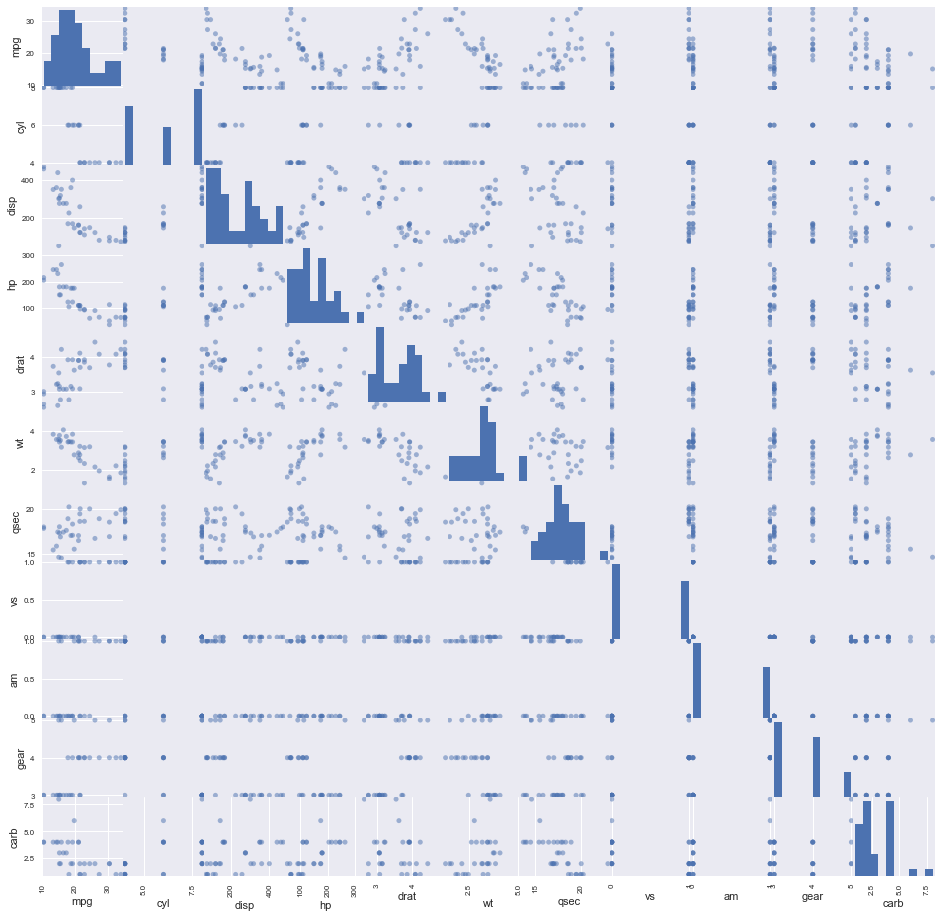

In [6]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix (cars, s=100, figsize=(16, 16));


The above plot (referred to as a scatter matrix), shows all the pairwise relationships between all of our numeric variables in the dataset. Often it is useful to plot only a subset of these variables if we're not particularly interested in some variables. But if we don't know anything about the data initially, this is a good way to assess visually if there are trends which we're interested in further.

#### Checking for multi-collinearity

We can also check if any variables appear to be highly-correlated. It is preferable to fit x-variables which are not correlated.

In [7]:
cars.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


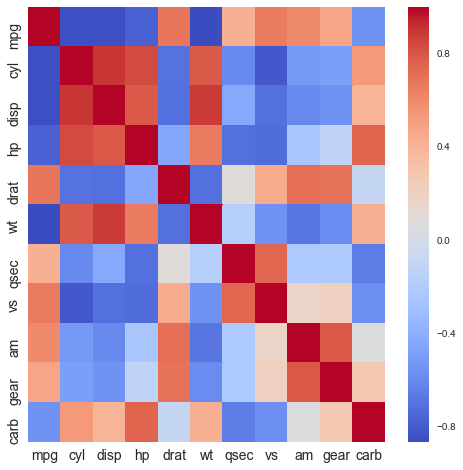

In [8]:
plt.figure(figsize=(8,8))
# calculate the correlation matrix
corr = cars.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap='coolwarm');
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14);

One of the major variables we're interested in for this dataset is fuel efficiency (assessed by *'miles per gallon'* **mgp**). From the plot above there appears to be an interesting relationship between *mpg* and *wt* (vehicle weight). Lets plot this relationship.

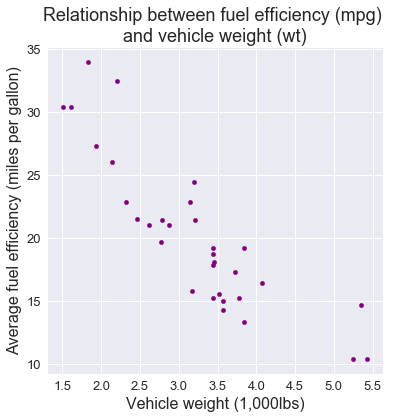

In [9]:
plt.figure(figsize=(6,6))
plt.scatter(cars.wt, cars.mpg, s=20, c='purple')


plt.title('Relationship between fuel efficiency (mpg) \nand vehicle weight (wt)', fontsize = 18)
plt.xlabel('Vehicle weight (1,000lbs)', fontsize = 16)
plt.ylabel('Average fuel efficiency (miles per gallon)', fontsize = 16)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13);

As above, the relationship looks interesting. Intuitively it's showing that heavier vehicles are less fuel efficient (I'm not a car expert.. but this seems intuitive). There is a negative relationship between vehicle weight and fuel efficiency. 

**Questions we could explore further:**
1. Can we quantify the relationship between vehicle weight and fuel efficiency? (for example using a simple linear regression)
2. Is the relationship linear? (or would a not linear relationship perhaps be a better fit)
3. Are there any outliers, or factors which we should consider? (for example, the three (3) cars with vehicle weight above 5.0? Is there a feature/characteristic particularly interesting about these)

### Model fitting

#### Simple linear regression (wt vs. mpg)

Let's fit a line to explain the relationship between miles per gallon (mpg) and vehicle weight (wt).

The functional form of this model is:

$ \mathrm{mpg}_i = \beta_0 + \beta_1\mathrm{wt}_i + \epsilon_i$

where $\beta_0$ and $\beta_1$ are the intercept and slope parameter respectively. Recall also one of the assumptions about linear regression models is $\epsilon_i \sim N(0,\sigma^2)$ (more on this later). 

I'll use the *statsmodels* package to fit [ordinary least squares](https://en.wikipedia.org/wiki/Ordinary_least_squares) regression. There are many different packages you can use; I'm not providing detail about which ones are best here (I'm indifferent to them.. I use them all).


In [10]:
y = cars.mpg
X = cars.wt

X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()   #remember to include the .fit() call


In [11]:
#this command prints the model summary / results summary

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     91.38
Date:                Mon, 23 Apr 2018   Prob (F-statistic):           1.29e-10
Time:                        21:36:20   Log-Likelihood:                -80.015
No. Observations:                  32   AIC:                             164.0
Df Residuals:                      30   BIC:                             167.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.2851      1.878     19.858      0.000      33.450      41.120
wt            -5.3445      0.559     -9.559      0.000      -6.486      -4.203
==============================================================================
Omnibus:                        2.988   Durbin-Watson:                   1.252
Prob(Omnibus):                  0.225   Jarque-Bera (JB):                2.399
Skew:                           0.668   Prob(JB):                        0.301
Kurtosis:                       2.877   Cond. No.                         12.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The above output is considered 'very standard' model fitting results output. It includes the following which I'll make specific mention of:

(1) The R-squared value: which tells you what % of variation in y (in this case 'mpg') is explained by the model fitted (in this case an 'intercept' plus an x-variable (wt)). Adjusted R-squared is similar to R-squared (some claim it is better); as it penalises model complexity (i.e. it can decrease as you add more variables).

(2) Model coefficients (the coef column): The model fitted in this case is the line $ \widehat{\mathrm{mpg}} = 37.285 + (-5.345)\widehat{\mathrm{wt}} $

(3) The columns next to coef provide the  std. err, t-value, p-value and 95% Lower and Upper CI estimates for the parameter ($\beta_0, \beta_1,$ etc.).

(4) F-test statistic (and p-value); and log-likelihood estimate are also commonly used; along with AIC and BIC

**Let's plot the line on the data.**

In [12]:
xVals = np.linspace(1.4, 5.6, 1000) #this function creates 1,000 points equally spaced between 1.4 (min), and 5.6 (max)
yVals = 37.285+(-1*5.345)*xVals

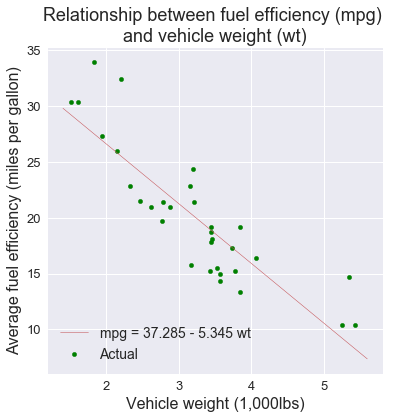

In [13]:
plt.figure(figsize=(6,6))
plt.scatter(cars.wt, cars.mpg, s=20, c='green', label='Actual')
plt.plot(xVals, yVals, 'r-', lw=0.5, label='mpg = 37.285 - 5.345 wt')
plt.plot()


plt.title('Relationship between fuel efficiency (mpg) \nand vehicle weight (wt)', fontsize = 18)
plt.xlabel('Vehicle weight (1,000lbs)', fontsize = 16)
plt.ylabel('Average fuel efficiency (miles per gallon)', fontsize = 16)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.legend(loc='lower left', fontsize = 14);

Recall earlier one of the assumptions needed for our linear model is that  $\epsilon_i \sim N(0,\sigma^2)$, and $\epsilon_i$ are i.i.d. 

We can assess the appropriateness of these assumptions by checking the model residuals. The residuals are the difference between the actual value (green dot) and model fit (red line), in our chart above. We obtain a residual for each observation.  

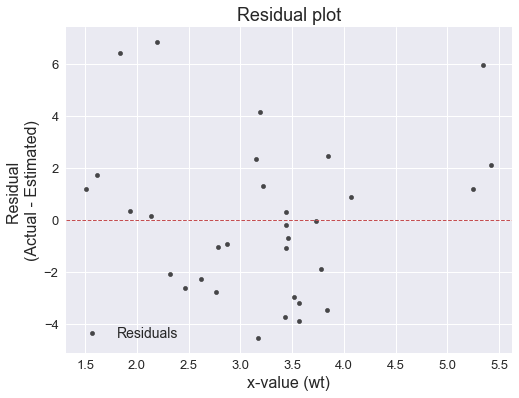

In [14]:
xResid = cars.wt

plt.figure(figsize=(8,6))
plt.scatter(xResid, results.resid, c='black', s=20, alpha=0.7, label='Residuals')
plt.axhline(y=0, ls='--', c='r', lw=1)
plt.legend(fontsize=14)
plt.title('Residual plot', fontsize = 18)
plt.xlabel('x-value (wt)', fontsize = 16)
plt.ylabel('Residual \n(Actual - Estimated)', fontsize = 16)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.legend(loc='lower left', fontsize = 14);

If the model is good; we wouldn't expect to see any trend in the residuals; and we would expect the residuals would be symmetrically 'scattered' (randomly) about the line $y=0$ (dotted red line above). 

If there is a trend in the residuals, or they're not randomly scattered about the line $y=0$, it means there's another feature in the data which our model hasn't accounted for.

#### More complicated linear modelling

It's common to fit more complicated models with both a linear term, a squared term, higher powers; and/or a log-term.

Let's explore more complicated models adding power terms, such as the following: 

$ \mathrm{mpg}_i = \beta_0 + \beta_1\mathrm{wt}_i + \beta_2\mathrm{wt}^2_i + \beta_3\mathrm{wt}^3_i + \beta_4\mathrm{wt}^4_i  + \epsilon_i$

In [15]:
## Subset the data

dataCut = cars[['mpg','wt']]
dataCut.head()


,mpg,wt
0,21.0,2.620
1,21.0,2.875
2,22.8,2.320
3,21.4,3.215
4,18.7,3.440


In [16]:
# Create Power variables
dataCut['x2'] =  dataCut.wt * dataCut.wt  
dataCut['x3'] =  dataCut.wt * dataCut.wt * dataCut.wt 
dataCut['x4'] =  dataCut.wt * dataCut.wt * dataCut.wt * dataCut.wt 

C:\Users\Jonathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Jonathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Jonathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [17]:
dataCut.head()

,mpg,wt,x2,x3,x4
0,21.0,2.620,6.864400,17.984728,47.119987
1,21.0,2.875,8.265625,23.763672,68.320557
2,22.8,2.320,5.382400,12.487168,28.970230
3,21.4,3.215,10.336225,33.230963,106.837547
4,18.7,3.440,11.833600,40.707584,140.034089


In [18]:
lm1=smf.ols('mpg~wt',data=dataCut).fit()
lm2=smf.ols('mpg~wt+x2',data=dataCut).fit()
lm3=smf.ols('mpg~wt+x2+x3',data=dataCut).fit()
lm4=smf.ols('mpg~wt+x2+x3+x4',data=dataCut).fit()

Let's look at the model summaries for each of these fits.

In [19]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     91.38
Date:                Mon, 23 Apr 2018   Prob (F-statistic):           1.29e-10
Time:                        21:36:21   Log-Likelihood:                -80.015
No. Observations:                  32   AIC:                             164.0
Df Residuals:                      30   BIC:                             167.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.2851      1.878     19.858      0.000      33.450      41.120
wt            -5.3445      0.559     -9.559      0.000      -6.486      -4.203
==============================================================================
Omnibus:                        2.988   Durbin-Watson:                   1.252
Prob(Omnibus):                  0.225   Jarque-Bera (JB):                2.399
Skew:                           0.668   Prob(JB):                        0.301
Kurtosis:                       2.877   Cond. No.                         12.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     65.64
Date:                Mon, 23 Apr 2018   Prob (F-statistic):           1.71e-11
Time:                        21:36:21   Log-Likelihood:                -75.024
No. Observations:                  32   AIC:                             156.0
Df Residuals:                      29   BIC:                             160.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     49.9308      4.211     11.856      0.000      41.318      58.544
wt           -13.3803      2.514     -5.322      0.000     -18.522      -8.239
x2             1.1711      0.359      3.258      0.003       0.436       1.906
==============================================================================
Omnibus:                        4.261   Durbin-Watson:                   1.732
Prob(Omnibus):                  0.119   Jarque-Bera (JB):                3.788
Skew:                           0.832   Prob(JB):                        0.150
Kurtosis:                       2.731   Cond. No.                         142.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     42.27
Date:                Mon, 23 Apr 2018   Prob (F-statistic):           1.58e-10
Time:                        21:36:21   Log-Likelihood:                -75.018
No. Observations:                  32   AIC:                             158.0
Df Residuals:                      28   BIC:                             163.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     48.4037     15.584      3.106      0.004      16.482      80.326
wt           -11.8260     15.463     -0.765      0.451     -43.501      19.849
x2             0.6894      4.740      0.145      0.885      -9.021      10.400
x3             0.0459      0.451      0.102      0.920      -0.877       0.969
==============================================================================
Omnibus:                        4.142   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.126   Jarque-Bera (JB):                3.701
Skew:                           0.819   Prob(JB):                        0.157
Kurtosis:                       2.697   Cond. No.                     2.79e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     31.17
Date:                Mon, 23 Apr 2018   Prob (F-statistic):           9.21e-10
Time:                        21:36:21   Log-Likelihood:                -74.765
No. Observations:                  32   AIC:                             159.5
Df Residuals:                      27   BIC:                             166.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.4558     54.048      0.267      0.791     -96.442     125.353
wt            36.6195     75.420      0.486      0.631    -118.130     191.369
x2           -23.7018     37.456     -0.633      0.532    -100.555      53.152
x3             5.2004      7.864      0.661      0.514     -10.935      21.335
x4            -0.3863      0.588     -0.657      0.517      -1.593       0.821
==============================================================================
Omnibus:                        3.786   Durbin-Watson:                   1.719
Prob(Omnibus):                  0.151   Jarque-Bera (JB):                3.433
Skew:                           0.774   Prob(JB):                        0.180
Kurtosis:                       2.579   Cond. No.                     5.91e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
rSquared = [lm1.rsquared, lm2.rsquared, lm3.rsquared, lm4.rsquared]
Intercept = [lm1.params[0], lm2.params[0], lm3.params[0], lm4.params[0]]
x1Coeff = [lm1.params[1], lm2.params[1], lm3.params[1], lm4.params[1]]
x2Coeff = [0, lm2.params[2], lm3.params[2], lm4.params[2]]
x3Coeff = [0, 0, lm3.params[3], lm4.params[3]]
x4Coeff = [0, 0, 0, lm4.params[4]]
count = [1., 2., 3., 4.]

In [24]:
results1 = {'power': count, 'Rsqu': rSquared, 'Int': Intercept, 'x1C' : x1Coeff, 'x2C' : x2Coeff, 'x3C' : x3Coeff, 'x4C' : x4Coeff}
index = [0, 1, 2, 3]

regressDf = pd.DataFrame(data=results1, index=index)

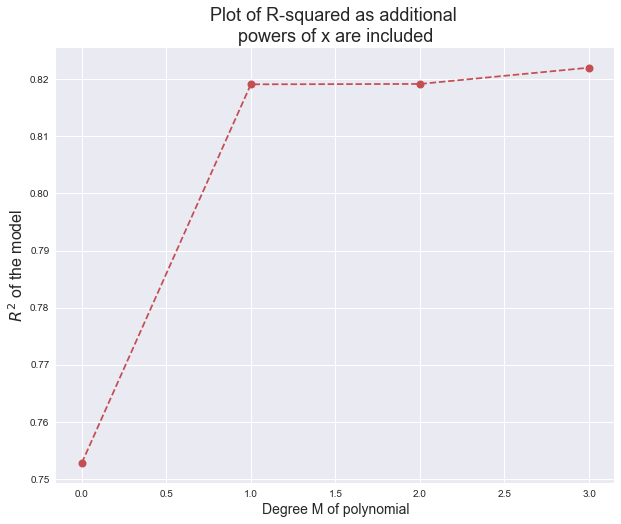

In [25]:

fig = plt.figure(figsize = (10,8))
plt.plot(range(0,4),regressDf.Rsqu,'ro--', markersize = 8, markeredgecolor='black')
plt.title("Plot of R-squared as additional \npowers of x are included", fontsize=18)
plt.xlabel('Degree M of polynomial', fontsize = 14)
plt.ylabel('$R^2$ of the model', fontsize = 16);

plt.show()

In [26]:

x = np.linspace(min(dataCut.wt), max(dataCut.wt), 100)


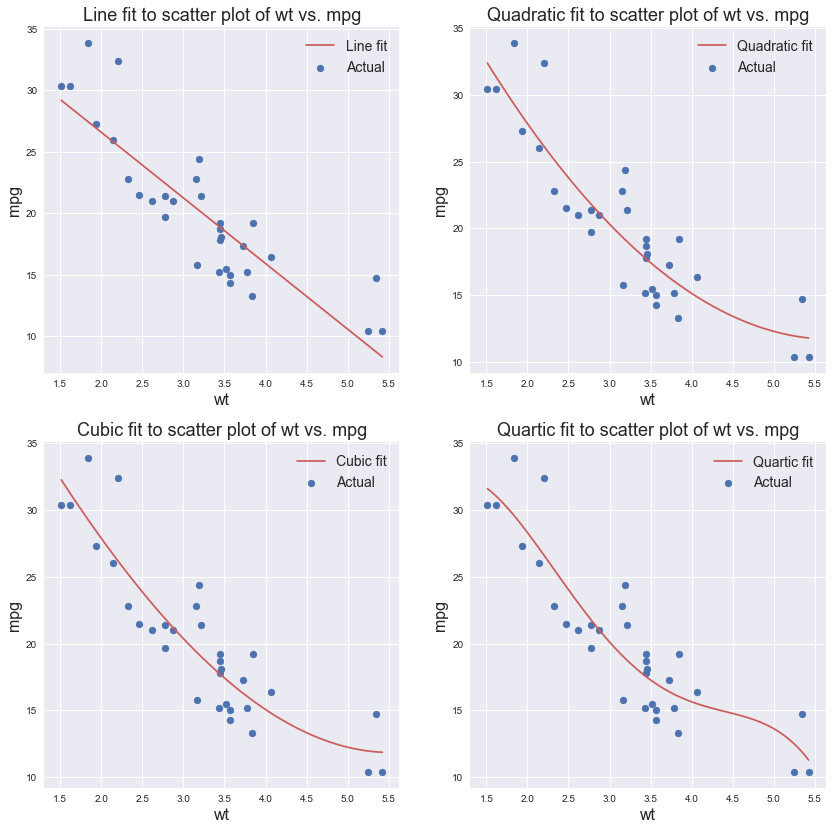

In [27]:
plt.figure(figsize=(14,14))

x = np.linspace(min(dataCut.wt), max(dataCut.wt), 100)

ax = plt.subplot(221)

plt.scatter(dataCut.wt, dataCut.mpg, label='Actual');
plt.plot(x, regressDf.x1C[0] * x + regressDf.Int[0], color = 'IndianRed', label='Line fit')
plt.title("Line fit to scatter plot of wt vs. mpg", fontsize=18)
plt.xlabel("wt", fontsize=16)
plt.ylabel("mpg", fontsize=16)
plt.legend(fontsize=14) 

ax = plt.subplot(222)

plt.scatter(dataCut.wt, dataCut.mpg, label='Actual');
plt.plot(x, regressDf.x2C[1] * x * x + regressDf.x1C[1] * x + regressDf.Int[1], color = 'IndianRed', label='Quadratic fit')
plt.title("Quadratic fit to scatter plot of wt vs. mpg", fontsize=18)
plt.xlabel("wt", fontsize=16)
plt.ylabel("mpg", fontsize=16)
plt.legend(fontsize=14) 

ax = plt.subplot(223)

plt.scatter(dataCut.wt, dataCut.mpg, label='Actual');
plt.plot(x, regressDf.x3C[2] * x * x * x + regressDf.x2C[2] * x * x + regressDf.x1C[2] * x + regressDf.Int[2], color = 'IndianRed', label='Cubic fit')
plt.title("Cubic fit to scatter plot of wt vs. mpg", fontsize=18)
plt.xlabel("wt", fontsize=16)
plt.ylabel("mpg", fontsize=16)
plt.legend(fontsize=14) 

ax = plt.subplot(224)

plt.scatter(dataCut.wt, dataCut.mpg, label='Actual');
plt.plot(x, regressDf.x4C[3] * x * x * x * x + regressDf.x3C[3] * x * x * x + regressDf.x2C[3] * x * x + regressDf.x1C[3] * x + regressDf.Int[3], color = 'IndianRed', label='Quartic fit')
plt.title("Quartic fit to scatter plot of wt vs. mpg", fontsize=18)
plt.xlabel("wt", fontsize=16)
plt.ylabel("mpg", fontsize=16)
plt.legend(fontsize=14); 


#### Multiple linear regression

Let's fit another transformed variable, and multiple regressors. This time we'll fit both weight and engine horsepower (hp), to determine miles per gallon.




In [28]:
multiData = cars[['mpg', 'wt', 'hp']]

multiData.head()

,mpg,wt,hp
0,21.0,2.620,110
1,21.0,2.875,110
2,22.8,2.320,93
3,21.4,3.215,110
4,18.7,3.440,175


And let's take the log of horsepower, so the model we'll fit is 

$ \mathrm{mpg}_i = \beta_0 + \beta_1\mathrm{wt}_i + \beta_2\mathrm{log(\mathrm{wt}_i)}  + \epsilon_i$

In [29]:
multiData['logHP'] = np.log(multiData['hp'])
multiData.head()

C:\Users\Jonathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,mpg,wt,hp,logHP
0,21.0,2.620,110,4.700480
1,21.0,2.875,110,4.700480
2,22.8,2.320,93,4.532599
3,21.4,3.215,110,4.700480
4,18.7,3.440,175,5.164786


In [30]:
lmMulti = smf.ols('mpg~wt+logHP',data=multiData).fit()

In [31]:
lmMulti.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     88.44
Date:                Mon, 23 Apr 2018   Prob (F-statistic):           4.54e-13
Time:                        21:36:24   Log-Likelihood:                -71.017
No. Observations:                  32   AIC:                             148.0
Df Residuals:                      29   BIC:                             152.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     59.5709      4.977     11.970      0.000      49.392      69.750
wt            -3.2856      0.615     -5.344      0.000      -4.543      -2.028
logHP         -5.9218      1.266     -4.678      0.000      -8.511      -3.333
==============================================================================
Omnibus:                        5.023   Durbin-Watson:                   1.665
Prob(Omnibus):                  0.081   Jarque-Bera (JB):                4.020
Skew:                           0.865   Prob(JB):                        0.134
Kurtosis:                       3.139   Cond. No.                         74.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

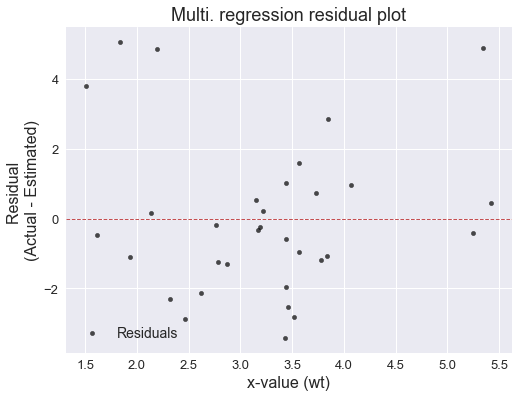

In [32]:
xResid = cars['wt'] #Still plot it against one of the x-variables to asses residuals

plt.figure(figsize=(8,6))
plt.scatter(xResid, lmMulti.resid, c='black', s=20, alpha=0.7, label='Residuals')
plt.axhline(y=0, ls='--', c='r', lw=1)
plt.legend(fontsize=14)
plt.title('Multi. regression residual plot', fontsize = 18)
plt.xlabel('x-value (wt)', fontsize = 16)
plt.ylabel('Residual \n(Actual - Estimated)', fontsize = 16)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.legend(loc='lower left', fontsize = 14);

Another common transformation is to normalize all variables by subtracting the mean; and dividing by the standard deviation.

e.g. to normalize the wt observations $\mathrm{wt}_{i,\mathrm{normalized}} = \frac{\mathrm{wt}_{i} - \mu_{\mathrm{wt}}}{\sigma_{\mathrm{wt}}}$

We could do this with all the variables also.



#### Fitting categorical variables (factors)

Let's look at the variable *cyl*. This is the number of cylinders the vehicle has. Cars generally come with either 4, 6 or 8 cyclinders in their engine.

What is we were interested to know what the difference between a 4 and a 6 cyclinder engine was (or a 4 and an 8 cylinder engine); but we couldn't request to have our car made with day 5.5 cyclinders (mainly because it would be quite the engineering acheivement to construct).

This type of question is referred to as factor modelling. We can undertake factor modelling using dummy variables. Let's create a dummy variable to signify if the vehicle is an 8 cylinder car.

In [33]:
factorData = cars[['mpg', 'wt', 'cyl']]

factorData.head()

,mpg,wt,cyl
0,21.0,2.620,6
1,21.0,2.875,6
2,22.8,2.320,4
3,21.4,3.215,6
4,18.7,3.440,8


In [34]:
factorData['cyl8'] = (factorData.cyl==8)*1  #creates a dummy variable (factor) for the 8 cylinder vehicles

C:\Users\Jonathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
factorData.head(10)

,mpg,wt,cyl,cyl8
0,21.0,2.620,6,0
1,21.0,2.875,6,0
2,22.8,2.320,4,0
3,21.4,3.215,6,0
4,18.7,3.440,8,1
5,18.1,3.460,6,0
6,14.3,3.570,8,1
7,24.4,3.190,4,0
8,22.8,3.150,4,0
9,19.2,3.440,6,0


The model fitted below is:

$ \mathrm{mpg}_i = \beta_0 + \beta_1\mathrm{wt}_i + \beta_2\mathrm{I_i(\mathrm{cyl} = 8)}  + \epsilon_i$


where $\mathrm{I_i(\mathrm{cyl} = 8)}$ is an indicator variable (dummy) $= 1$ if $\mathrm{cyl} =8$ and $0$ otherwise.

In [36]:
lmFactor = smf.ols('mpg~wt+cyl8',data=factorData).fit()

In [37]:
lmFactor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     52.23
Date:                Mon, 23 Apr 2018   Prob (F-statistic):           2.44e-10
Time:                        21:36:25   Log-Likelihood:                -77.954
No. Observations:                  32   AIC:                             161.9
Df Residuals:                      29   BIC:                             166.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.0668      2.107     16.641      0.000      30.757      39.377
wt            -4.2523      0.764     -5.567      0.000      -5.815      -2.690
cyl8          -2.9608      1.483     -1.997      0.055      -5.994       0.072
==============================================================================
Omnibus:                        4.984   Durbin-Watson:                   1.278
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                4.142
Skew:                           0.881   Prob(JB):                        0.126
Kurtosis:                       3.027   Cond. No.                         16.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Variable selection

There are a lot of different methods and criteria for variable selection; using lots of the different criteria provided in the model summary.

Two common techniques include [**Forward** and **Backward** stepwise regression](https://gerardnico.com/data_mining/stepwise_regression), which you can read more about here; and we'll undertake an example of Backward stepwise as part of the Homework problem.

There are also the AIC, BIC, Log-likelihood, F-statistics which you may use; and these may all select very different models depending on which technique is applied; and depending on what you are trying to model, each will have their advantages and disadvantages.

### Prediction Intervals

In this course, we've spoke a lot about confidence intervals for parameters and population means. What about if we're interested in using a model to predict an outcome variable ($y$), given input $x$, or $(x_1, x_2,..., x_k)$.

Let's return to our simple linear regression example earlier fitting mpg as a function of wt. Let's also plot the prediction intervals for this.

0.0
0.0
0.0


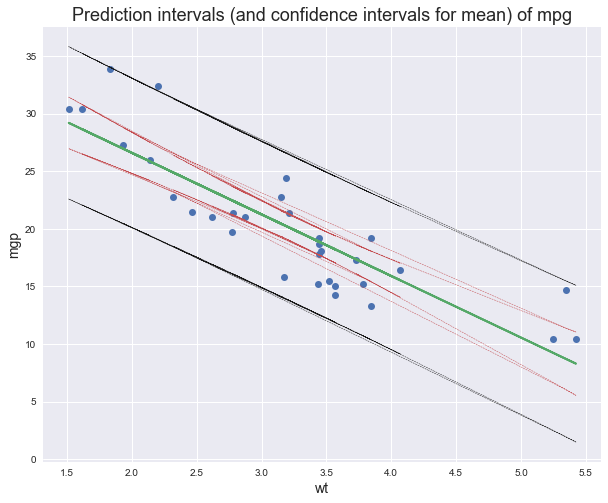

In [38]:
from statsmodels.stats.outliers_influence import summary_table
from statsmodels.sandbox.regression.predstd import wls_prediction_std

plt.figure(figsize=(10,8))

prstd, iv_l, iv_u = wls_prediction_std(results)

x_pred = np.linspace(min(cars.wt), max(cars.wt), 32)

st, data, ss2 = summary_table(results, alpha=0.05)

fittedvalues = data[:,2]
predict_mean_se  = data[:,3]
predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T
predict_ci_low, predict_ci_upp = data[:,6:8].T

# check we got the right things
print(np.max(np.abs(results.fittedvalues - fittedvalues)))
print(np.max(np.abs(iv_l - predict_ci_low)))
print(np.max(np.abs(iv_u - predict_ci_upp)))

plt.plot(cars.wt, cars.mpg, 'o')
plt.plot(cars.wt, fittedvalues, '-', lw=2)
plt.plot(cars.wt, predict_ci_low, 'k--', marker=None, lw=0.5)
plt.plot(cars.wt, predict_ci_upp, 'k--', marker=None, lw=0.5)
plt.plot(cars.wt, predict_mean_ci_low, 'r--', marker=None, lw=0.5)
plt.plot(cars.wt, predict_mean_ci_upp, 'r--', marker=None, lw=0.5)

plt.title("Prediction intervals (and confidence intervals for mean) of mpg", fontsize=18)
plt.xlabel('wt', fontsize = 14)
plt.ylabel('mgp', fontsize = 14);

plt.show()

The above chart shows the actuall observations for wt against mpg; fitted line in green, along with confidence interval for model fit (in red); and prediction interval for new observations (in black).

## Questions

________
*Question 1*

Plot a scatter matrix with only the following features from the cars dataset 'disp', 'hp', 'drat', 'qsec', 'carb' and 'gear' (the carsReduced dataset below). Comment on the most interesting relationships you observe between these variables (2-3 comments about the data is enough). (10 points)




In [39]:
carsReduced = cars[['disp', 'hp', 'drat', 'qsec', 'carb', 'gear']]

In [40]:
# your answer here



In [41]:
# your answer / explanation here

________
*Question 2*

(a) Fit a simple linear regression from one of the relationships you find interesting from this data (e.g. hp vs. disp). (5 points)
   
(b) Print a model summary, and interpret the coefficients. (5 points)
   
(c) How well does your model explain variation in your fitted y-variable? (5 points)
   
(d) Provide a plot of your data, along with fitted model (i.e. your plot should include both actual observations, and a line/model fit) (10 points)
   
(e) Plot the residuals (y-axis) from your model against your x-variable. Comment on the residual plot with reference to assumptions used in linear model fitting (5 points)

(Total 30 points)
   

In [42]:
# your answer here

________
*Question 3*

For this question you will undertake a backward stepwise regression. The model *lmBWStepwise* fitted below with regression summary provided.

Your goal is to simplify this model by iteratively removing variables until you have simplified the regression fit such that all variables are significantly different from zero (0). 

State your final simplified model, and print the model summary for it, along with explanation of which variables you removed (iteratively) and why? (20 points)

In [43]:
lmBWStepwise = smf.ols('hp~disp+drat+qsec+carb+gear',data=carsReduced).fit()

In [44]:
lmBWStepwise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     hp   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     37.73
Date:                Mon, 23 Apr 2018   Prob (F-statistic):           4.08e-11
Time:                        21:37:08   Log-Likelihood:                -146.41
No. Observations:                  32   AIC:                             304.8
Df Residuals:                      26   BIC:                             313.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    158.7578    113.061      1.404      0.172     -73.642     391.158
disp           0.3165      0.075      4.235      0.000       0.163       0.470
drat          -6.5485     14.629     -0.448      0.658     -36.618      23.521
qsec          -7.5424      3.863     -1.953      0.062     -15.483       0.398
carb          15.5697      4.377      3.557      0.001       6.573      24.567
gear           7.9457     11.791      0.674      0.506     -16.291      32.182
==============================================================================
Omnibus:                        1.529   Durbin-Watson:                   2.183
Prob(Omnibus):                  0.465   Jarque-Bera (JB):                1.012
Skew:                           0.027   Prob(JB):                        0.603
Kurtosis:                       2.131   Cond. No.                     6.44e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
# your answer here

________
*Question 4*

Your friend Ashley is helping you with a predictive analysis modeling fuel efficiency (mpg) as a function of weight (wt). She has fitted the following model with 31 parameters; and claims the model to be superior as it explains over 99% of the variation in $\mathrm{mpg}_i$. 

$ \mathrm{mpg}_i = \beta_0 + \beta_1\mathrm{wt}_i + \beta_2\mathrm{wt}^2_i + \dots + \beta_{29}\mathrm{wt}^{29}_i + \beta_{30}\mathrm{wt}^{30}_i + \epsilon_i$

Comment on the appropriateness of this model and it's predictive power using the cars dataset. 

Is Ashley's observation about variation in $\mathrm{mpg}_i$ correct? 

*(Note, you don't need to fit or plot the model in this case; although if it supports your conclusions; you are welcome to).*

(20 points)

In [46]:
# your answer here

________
*Question 5*

Your friend Baiyue is interested in modeling the number of cylinders for vehicles. He has fitted the following model:


$ \mathrm{mpg}_i = \beta_0 + \beta_1\mathrm{wt}_i + \beta_2\mathrm{I_i(\mathrm{cyl} = 8)} + \beta_3\mathrm{I_i(\mathrm{cyl} = 6)} + \beta_4\mathrm{I_i(\mathrm{cyl} = 4)}   + \epsilon_i$

##### You are told this model is mispecified. 

Provide an interpretation of the model coefficients, or suggest a better specified model which is better interpreted. Remember, Baiyue is interested in modelling the differences in vehicles attributable to number of cylinders (on average is okay). (20 points)


In [47]:
multiFactorData = cars[['mpg', 'wt', 'cyl']]

In [48]:
multiFactorData['cyl8'] = (factorData.cyl==8)*1  #creates a dummy variable (factor) for the 8 cylinder vehicles
multiFactorData['cyl6'] = (factorData.cyl==6)*1  #creates a dummy variable (factor) for the 6 cylinder vehicles
multiFactorData['cyl4'] = (factorData.cyl==4)*1  #creates a dummy variable (factor) for the 4 cylinder vehicles

C:\Users\Jonathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Jonathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Jonathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:

In [49]:
lmMultiFactor = smf.ols('mpg~wt+cyl4+cyl6+cyl8',data=multiFactorData).fit()

In [50]:
lmMultiFactor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     48.08
Date:                Mon, 23 Apr 2018   Prob (F-statistic):           3.59e-11
Time:                        21:37:12   Log-Likelihood:                -73.311
No. Observations:                  32   AIC:                             154.6
Df Residuals:                      28   BIC:                             160.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.9115      1.807     12.680      0.000      19.210      26.613
wt            -3.2056      0.754     -4.252      0.000      -4.750      -1.661
cyl4          11.0793      0.651     17.010      0.000       9.745      12.414
cyl6           6.8237      0.962      7.092      0.000       4.853       8.795
cyl8           5.0084      1.380      3.631      0.001       2.183       7.834
==============================================================================
Omnibus:                        2.709   Durbin-Watson:                   1.806
Prob(Omnibus):                  0.258   Jarque-Bera (JB):                1.735
Skew:                           0.559   Prob(JB):                        0.420
Kurtosis:                       3.222   Cond. No.                     4.80e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.75e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
# your answer here